## Import Library

In [1]:
import pandas as pd

import calendar
import datetime

## Import data

In [2]:
data = pd.read_csv('TANKTemp060_098.csv',sep=",", header=None, names=["date", "value"])
data

,date,value
0,2015-060-00:00:30.114,18.744939
1,2015-060-00:00:30.882,18.744900
2,2015-060-00:02:38.114,18.785425
3,2015-060-00:02:38.882,18.785400
4,2015-060-00:04:46.114,18.785425
...,...,...
32117,2015-098-02:25:34.114,18.502024
32118,2015-098-02:27:42.114,18.502024
32119,2015-098-02:29:50.110,18.542510
32120,2015-098-02:31:58.114,18.542510


## Prepare data

In [3]:
data.dropna(inplace=True)
# data.reindex(data)



data.reset_index(drop=True, inplace = True)
data.head(1572)

,date,value
0,2015-060-00:00:30.114,18.744939
1,2015-060-00:00:30.882,18.744900
2,2015-060-00:02:38.114,18.785425
3,2015-060-00:02:38.882,18.785400
4,2015-060-00:04:46.114,18.785425
...,...,...
1567,2015-061-13:50:22.110,20.698925
1568,2015-061-13:50:22.877,20.698900
1569,2015-061-13:52:30.114,20.698925
1570,2015-061-13:54:38.114,20.698925


In [4]:
data['StandardTime']=0
data.head(1572)

,date,value,StandardTime
0,2015-060-00:00:30.114,18.744939,0
1,2015-060-00:00:30.882,18.744900,0
2,2015-060-00:02:38.114,18.785425,0
3,2015-060-00:02:38.882,18.785400,0
4,2015-060-00:04:46.114,18.785425,0
...,...,...,...
1567,2015-061-13:50:22.110,20.698925,0
1568,2015-061-13:50:22.877,20.698900,0
1569,2015-061-13:52:30.114,20.698925,0
1570,2015-061-13:54:38.114,20.698925,0


In [5]:
data

,date,value,StandardTime
0,2015-060-00:00:30.114,18.744939,0
1,2015-060-00:00:30.882,18.744900,0
2,2015-060-00:02:38.114,18.785425,0
3,2015-060-00:02:38.882,18.785400,0
4,2015-060-00:04:46.114,18.785425,0
...,...,...,...
32114,2015-098-02:25:34.114,18.502024,0
32115,2015-098-02:27:42.114,18.502024,0
32116,2015-098-02:29:50.110,18.542510,0
32117,2015-098-02:31:58.114,18.542510,0


In [6]:
for i in range(len(data)):
    dd=data['date'][i].split('-')
    yy=int(dd[0])
    jd=int(dd[1])
    sec=dd[2].split(':')
    ss=sec[2][:-4]
    mm=sec[2][-3:]
    month = 1
    day = 0
    while jd - calendar.monthrange(yy,month)[1] > 0 and month <= 12:
        jd = jd - calendar.monthrange(yy,month)[1]
        month = month + 1

    data['StandardTime'][i]=datetime.datetime(yy, month, jd, int(sec[0]),int(sec[1]),int(ss),int(mm)*1000)

data.head()

D:\Anaconda3\envs\arima\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,value,StandardTime
0,2015-060-00:00:30.114,18.744939,2015-03-01 00:00:30.114000
1,2015-060-00:00:30.882,18.744900,2015-03-01 00:00:30.882000
2,2015-060-00:02:38.114,18.785425,2015-03-01 00:02:38.114000
3,2015-060-00:02:38.882,18.785400,2015-03-01 00:02:38.882000
4,2015-060-00:04:46.114,18.785425,2015-03-01 00:04:46.114000


In [7]:
data['epoch']=0
data.head()

,date,value,StandardTime,epoch
0,2015-060-00:00:30.114,18.744939,2015-03-01 00:00:30.114000,0
1,2015-060-00:00:30.882,18.744900,2015-03-01 00:00:30.882000,0
2,2015-060-00:02:38.114,18.785425,2015-03-01 00:02:38.114000,0
3,2015-060-00:02:38.882,18.785400,2015-03-01 00:02:38.882000,0
4,2015-060-00:04:46.114,18.785425,2015-03-01 00:04:46.114000,0


In [8]:
from datetime import datetime
import time

for i_m in range(len(data)):
    # convert utc -> epoch(sec)
    dd = time.mktime(data['StandardTime'][i_m].timetuple())
    ms = int(int(str(data['StandardTime'][i_m]).split('.')[1])/1000)
    # build epoch (millisec) by add microsec from utc to epoch(sec)
    ep_mil = int(str(int(dd))+str(ms))
    # add epoch (milsec) -> epoch column
    data['epoch'][i_m] = ep_mil

D:\Anaconda3\envs\arima\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [9]:
data.head()

,date,value,StandardTime,epoch
0,2015-060-00:00:30.114,18.744939,2015-03-01 00:00:30.114000,1425142830114
1,2015-060-00:00:30.882,18.744900,2015-03-01 00:00:30.882000,1425142830882
2,2015-060-00:02:38.114,18.785425,2015-03-01 00:02:38.114000,1425142958114
3,2015-060-00:02:38.882,18.785400,2015-03-01 00:02:38.882000,1425142958882
4,2015-060-00:04:46.114,18.785425,2015-03-01 00:04:46.114000,1425143086114


Text(0.5, 0, 'Time')

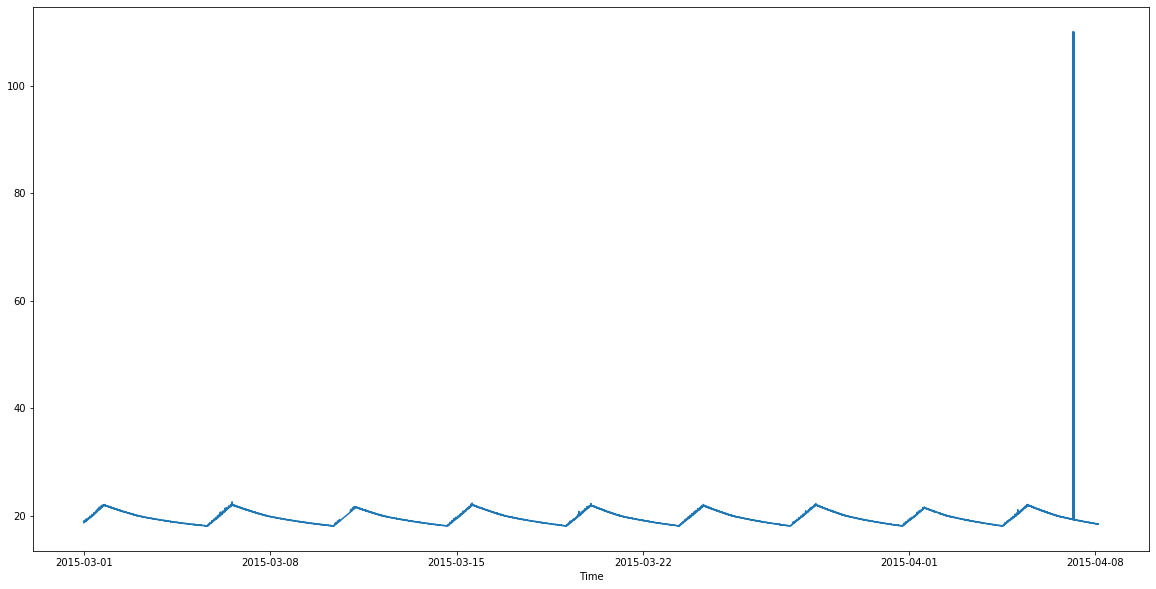

In [10]:
data['StandardTime'] = pd.to_datetime(data['StandardTime'])

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,10))
plt.plot(data['StandardTime'], data['value'])
plt.xlabel('Time')

In [11]:
data_sample = data.copy()

In [12]:
# remove outiler



In [13]:
qt1 = data_sample['value'].quantile([.25])
qt1=float(qt1.to_numpy())
qt3 = data_sample['value'].quantile([.75])
qt3 = float(qt3.to_numpy())

# calculate max value of boxplot
max_box = qt3+(1.5*(qt3-qt1))
max_box

23.460668

In [14]:
data_out = data_sample.copy()

In [15]:
# remove outlier
data_out.drop(data_out[data_out['value']>max_box].index, inplace=True)
data_out.reset_index(drop=True, inplace = True)

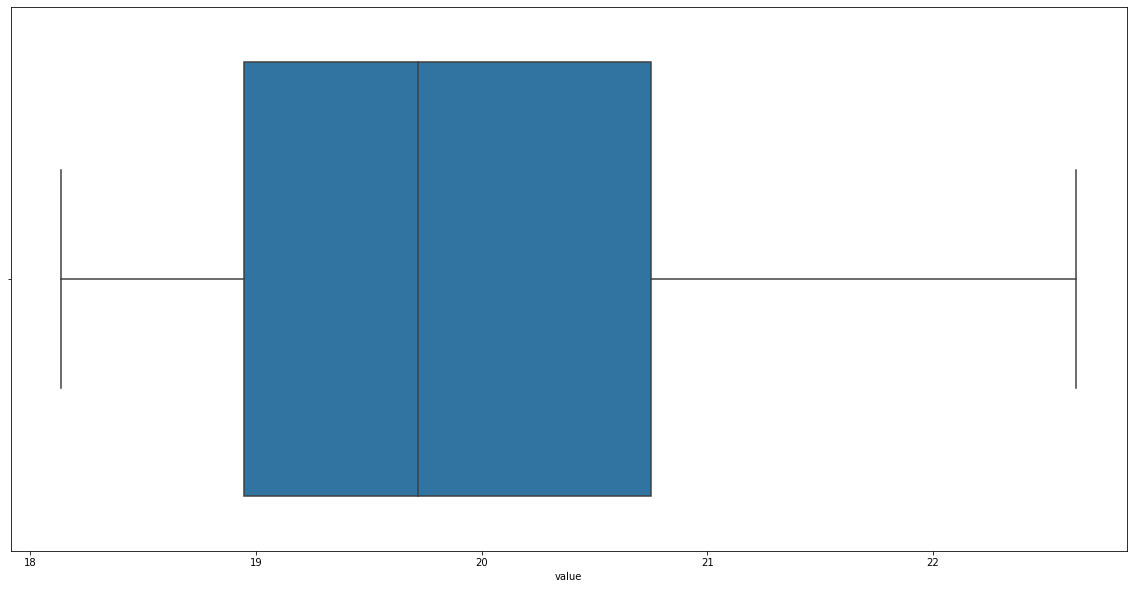

In [16]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.boxplot(data_out['value'])

Text(0.5, 0, 'Time')

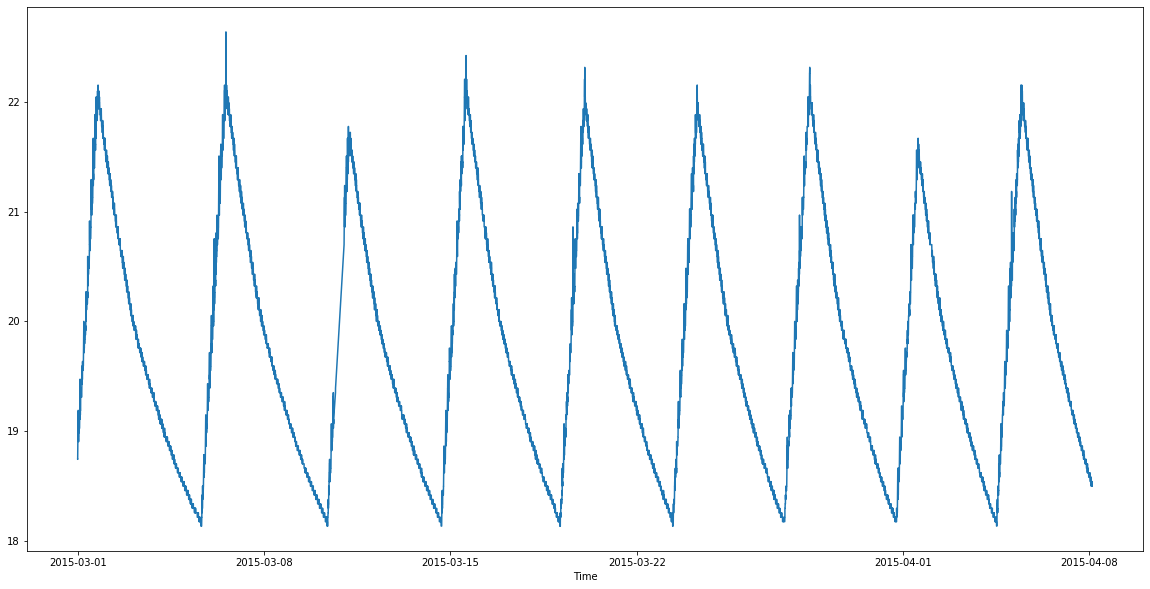

In [17]:
plt.figure(figsize=(20,10))
plt.plot(data_out['StandardTime'], data_out['value'])
plt.xlabel('Time')

In [18]:
# data with outlier ==> data_sample
# data without outlier ==> data_out

## Isolation Forest

In [19]:
data_sample_iso = data_sample.copy()

In [20]:
from sklearn import preprocessing

min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data_sample_iso[['value','epoch']])
data_pre = pd.DataFrame(np_scaled)

In [21]:
data_pre

,0,1
0,-0.856509,0.183011
1,-0.856539,0.183011
2,-0.825214,0.183012
3,-0.825233,0.183012
4,-0.825214,0.183012
...,...,...
32114,-1.044280,0.196985
32115,-1.044280,0.196986
32116,-1.012985,0.196986
32117,-1.012985,0.196987


In [22]:
from sklearn.ensemble import IsolationForest

outliers_fraction = 0.003
model = IsolationForest(contamination = outliers_fraction)
model.fit(data_pre)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.003,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [23]:
# add the data to the main  
data_sample_iso['anomaly_iso'] = pd.Series(model.predict(data_pre))
data_sample_iso['anomaly_iso'] = data_sample_iso['anomaly_iso'].map( {1: 0, -1: 1} )
print(data_sample_iso['anomaly_iso'].value_counts())

0    32023
1       96
Name: anomaly_iso, dtype: int64


In [24]:
data_sample_iso

,date,value,StandardTime,epoch,anomaly_iso
0,2015-060-00:00:30.114,18.744939,2015-03-01 00:00:30.114,1425142830114,0
1,2015-060-00:00:30.882,18.744900,2015-03-01 00:00:30.882,1425142830882,0
2,2015-060-00:02:38.114,18.785425,2015-03-01 00:02:38.114,1425142958114,0
3,2015-060-00:02:38.882,18.785400,2015-03-01 00:02:38.882,1425142958882,0
4,2015-060-00:04:46.114,18.785425,2015-03-01 00:04:46.114,1425143086114,0
...,...,...,...,...,...
32114,2015-098-02:25:34.114,18.502024,2015-04-08 02:25:34.114,1428434734114,0
32115,2015-098-02:27:42.114,18.502024,2015-04-08 02:27:42.114,1428434862114,0
32116,2015-098-02:29:50.110,18.542510,2015-04-08 02:29:50.110,1428434990110,0
32117,2015-098-02:31:58.114,18.542510,2015-04-08 02:31:58.114,1428435118114,0


In [25]:
y_anomaly = data_sample_iso[data_sample_iso['anomaly_iso'] == 1]
y_anomaly.head(2)

,date,value,StandardTime,epoch,anomaly_iso
615,2015-060-14:01:02.064,21.612903,2015-03-01 14:01:02.064,142519326264,1
638,2015-060-14:30:54.064,21.451613,2015-03-01 14:30:54.064,142519505464,1


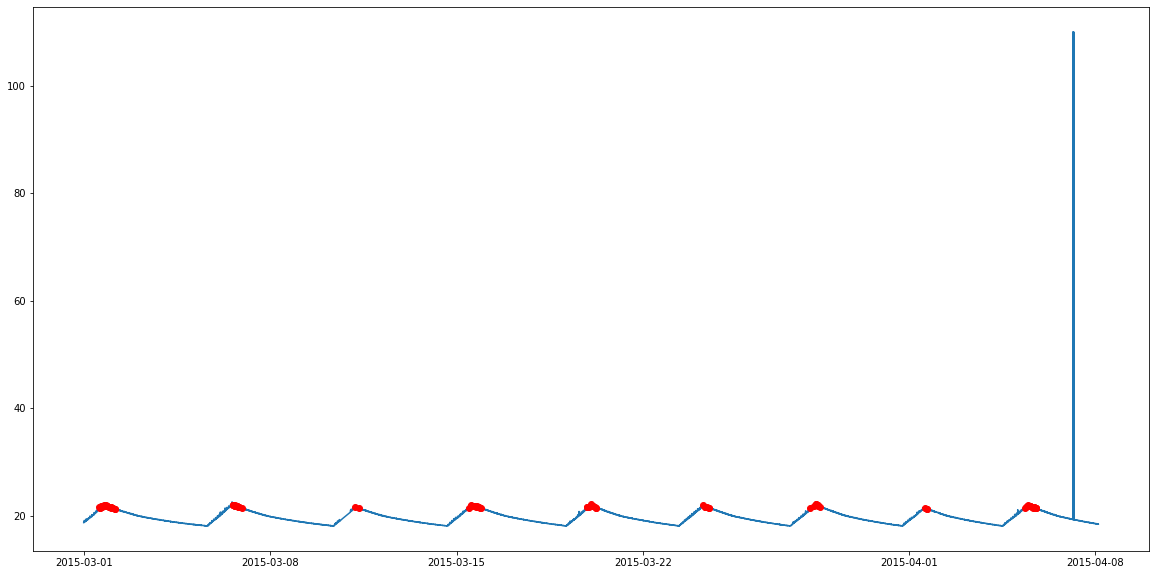

In [26]:
plt.figure(figsize=(20,10))
plt.plot(data_sample_iso['StandardTime'], data_sample_iso['value'])
plt.plot(y_anomaly['StandardTime'],y_anomaly['value'], 'ro' )

0    31213
1      906
Name: anomaly_iso, dtype: int64


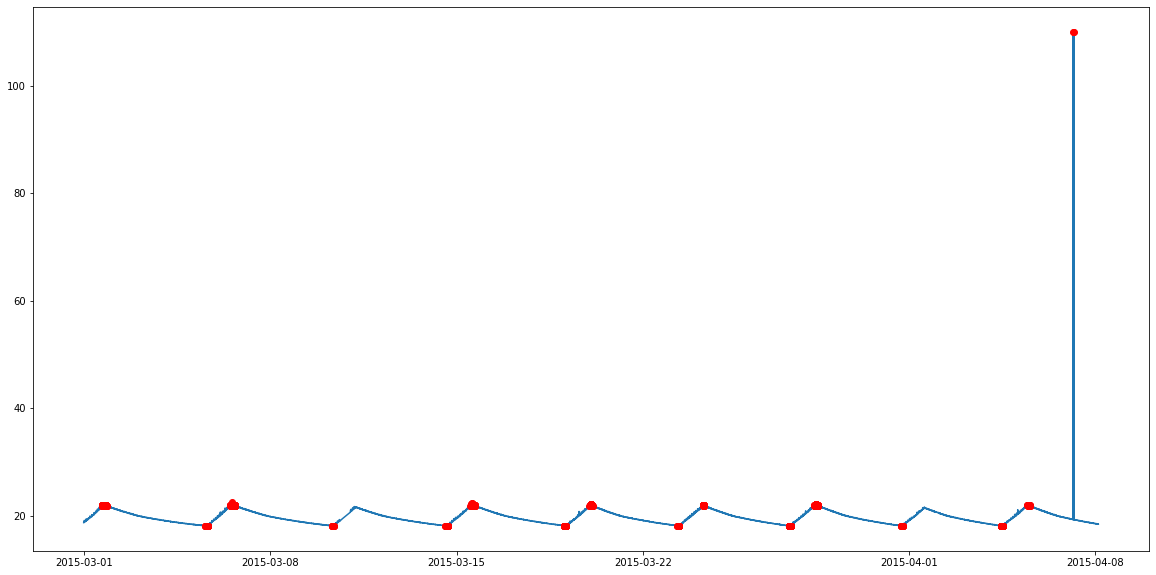

In [36]:
data_sample_iso = data_sample.copy()

from sklearn import preprocessing
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data_sample_iso[['value','value']])
data_pre = pd.DataFrame(np_scaled)

from sklearn.ensemble import IsolationForest
outliers_fraction = 0.03
model = IsolationForest(contamination = outliers_fraction)
model.fit(data_pre)

data_sample_iso['anomaly_iso'] = pd.Series(model.predict(data_pre))
data_sample_iso['anomaly_iso'] = data_sample_iso['anomaly_iso'].map( {1: 0, -1: 1} )
print(data_sample_iso['anomaly_iso'].value_counts())

y_anomaly = data_sample_iso[data_sample_iso['anomaly_iso'] == 1]
y_anomaly.head(2)


plt.figure(figsize=(20,10))
plt.plot(data_sample_iso['StandardTime'], data_sample_iso['value'])
plt.plot(y_anomaly['StandardTime'],y_anomaly['value'], 'ro' )

In [27]:
data_sample_iso = data_out.copy()

In [28]:
from sklearn import preprocessing

min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data_sample_iso[['value','epoch']])
data_pre = pd.DataFrame(np_scaled)

In [29]:
from sklearn.ensemble import IsolationForest

outliers_fraction = 0.005
model = IsolationForest(contamination = outliers_fraction)
model.fit(data_pre)

# add the data to the main  
data_sample_iso['anomaly_iso'] = pd.Series(model.predict(data_pre))
data_sample_iso['anomaly_iso'] = data_sample_iso['anomaly_iso'].map( {1: 0, -1: 1} )
print(data_sample_iso['anomaly_iso'].value_counts())

0    31958
1      159
Name: anomaly_iso, dtype: int64


In [30]:
data_sample_iso

,date,value,StandardTime,epoch,anomaly_iso
0,2015-060-00:00:30.114,18.744939,2015-03-01 00:00:30.114,1425142830114,0
1,2015-060-00:00:30.882,18.744900,2015-03-01 00:00:30.882,1425142830882,0
2,2015-060-00:02:38.114,18.785425,2015-03-01 00:02:38.114,1425142958114,0
3,2015-060-00:02:38.882,18.785400,2015-03-01 00:02:38.882,1425142958882,0
4,2015-060-00:04:46.114,18.785425,2015-03-01 00:04:46.114,1425143086114,0
...,...,...,...,...,...
32112,2015-098-02:25:34.114,18.502024,2015-04-08 02:25:34.114,1428434734114,0
32113,2015-098-02:27:42.114,18.502024,2015-04-08 02:27:42.114,1428434862114,0
32114,2015-098-02:29:50.110,18.542510,2015-04-08 02:29:50.110,1428434990110,0
32115,2015-098-02:31:58.114,18.542510,2015-04-08 02:31:58.114,1428435118114,0


In [31]:
y_anomaly = data_sample_iso[data_sample_iso['anomaly_iso'] == 1]
y_anomaly.head(2)

,date,value,StandardTime,epoch,anomaly_iso
615,2015-060-14:01:02.064,21.612903,2015-03-01 14:01:02.064,142519326264,1
638,2015-060-14:30:54.064,21.451613,2015-03-01 14:30:54.064,142519505464,1


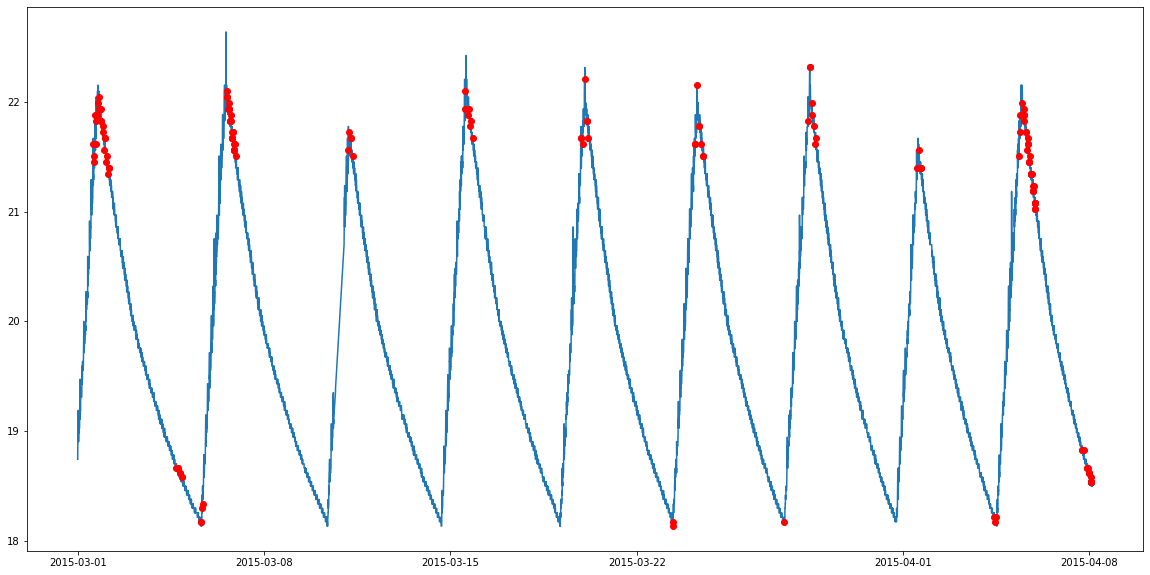

In [32]:
plt.figure(figsize=(20,10))
plt.plot(data_sample_iso['StandardTime'], data_sample_iso['value'])
plt.plot(y_anomaly['StandardTime'],y_anomaly['value'], 'ro' )

0    31957
1      160
Name: anomaly_iso, dtype: int64


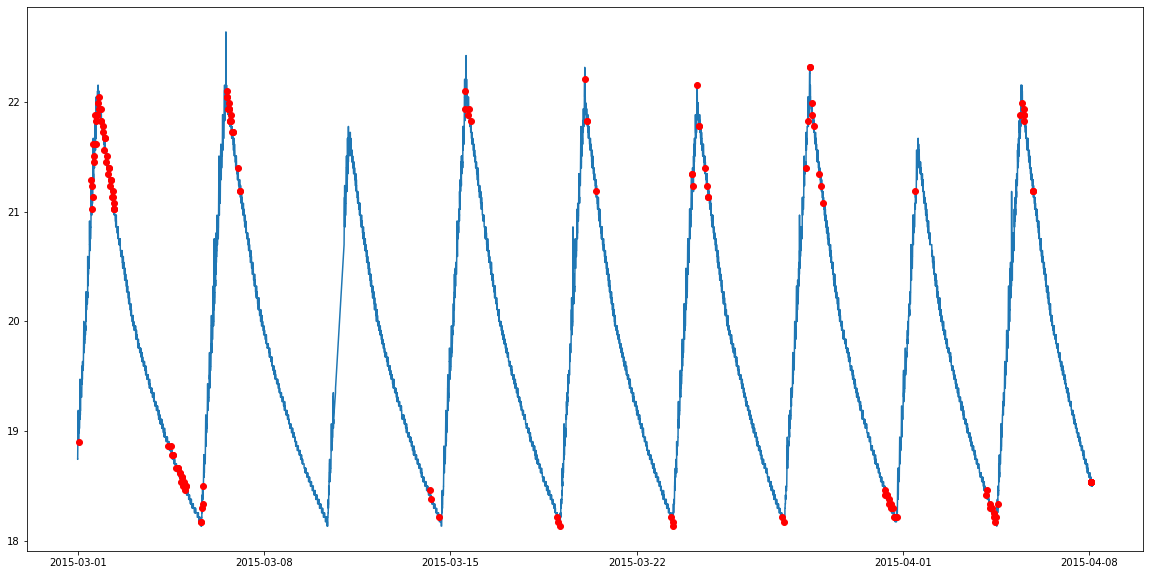

In [37]:
data_sample_iso = data_out.copy()

from sklearn import preprocessing

min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data_sample_iso[['value','epoch']])
data_pre = pd.DataFrame(np_scaled)

from sklearn.ensemble import IsolationForest

outliers_fraction = 0.005
model = IsolationForest(contamination = outliers_fraction)
model.fit(data_pre)

# add the data to the main  
data_sample_iso['anomaly_iso'] = pd.Series(model.predict(data_pre))
data_sample_iso['anomaly_iso'] = data_sample_iso['anomaly_iso'].map( {1: 0, -1: 1} )
print(data_sample_iso['anomaly_iso'].value_counts())

y_anomaly = data_sample_iso[data_sample_iso['anomaly_iso'] == 1]
y_anomaly.head(2)

plt.figure(figsize=(20,10))
plt.plot(data_sample_iso['StandardTime'], data_sample_iso['value'])
plt.plot(y_anomaly['StandardTime'],y_anomaly['value'], 'ro' )